In [1]:
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from keras import backend as K

In [2]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

We need to normalize inputs like this: $$x_{norm} = \frac{x}{255} - 0.5$$

We need to convert class labels to one-hot encoded vectors. Use __keras.utils.to_categorical__.

In [4]:
# normalize inputs
x_train2 = (x_train / 255) - 0.5
x_test2 = (x_test / 255) - 0.5
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [5]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(10,activation='softmax'),
])

In [6]:
from tensorflow.keras.optimizers import Adamax

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adamax(lr=INIT_LR),
    metrics=['accuracy']
)
# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))
        

In [9]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

In [11]:
# fit model
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),
               LrHistory()
#                ,utils.TqdmProgressCallback(),
#                utils.ModelSaveCallback(model_filename)
              ],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=1,
    initial_epoch=last_finished_epoch or 0
)

Learning rate: 0.005
Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8956 - accuracy: 0.6867 - val_loss: 0.7907 - val_accuracy: 0.7299 - lr: 0.0050
Learning rate: 0.0045
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7913 - accuracy: 0.7241 - val_loss: 0.7389 - val_accuracy: 0.7405 - lr: 0.0045
Learning rate: 0.00405
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7094 - accuracy: 0.7508 - val_loss: 0.6981 - val_accuracy: 0.7639 - lr: 0.0041
Learning rate: 0.003645
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6522 - accuracy: 0.7713 - val_loss: 0.6743 - val_accuracy: 0.7683 - lr: 0.0036
Learning rate: 0.0032805
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6026 - accuracy: 0.7897 - val_loss: 0.6512 - val_accuracy: 0.7818 - lr: 0.0033
Learning rate: 0.00295245
Epoch 6/10
1563/1563 [==============================] - 77s 49ms

In [12]:
model.evaluate(x_test2,y_test2)

313/313 [==============================] - 4s 14ms/step - loss: 0.6294 - accuracy: 0.7980


[0.6294237375259399, 0.7979999780654907]

In [13]:
model.save('cnn_model_v2.keras')

In [14]:
loaded_model = tf.keras.models.load_model('cnn_model_v2.keras')

1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Output Label: 7
horse
[7]


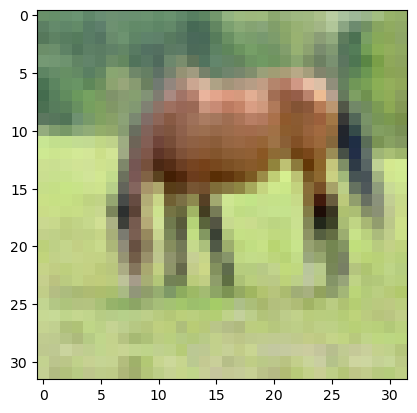

In [20]:
ar = 60
plt.imshow(x_test[ar])

labels = ["airplane","automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
import cv2

resized_img = cv2.resize(x_test[ar], (32,32))
resized_img= np.expand_dims(resized_img, axis=0)

pre=loaded_model.predict(resized_img)
print(pre)
n = np.argmax(pre)                                                     

print("Output Label:", n)
print(labels[n])
print(y_test[ar])